# Achmad Nur Bani Suta (2209106016)

## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("games.csv")

df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


## Visualisai Data Menggunakan Bar Plot

In [2]:
df.loc[df['Release Date'] == 'releases on TBD', 'Release Date'] = 'Dec 31, 2024'

In [3]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['bulan'] = df['Release Date'].dt.month
df['tahun'] = df['Release Date'].dt.year
df['hari'] = df['Release Date'].dt.day

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


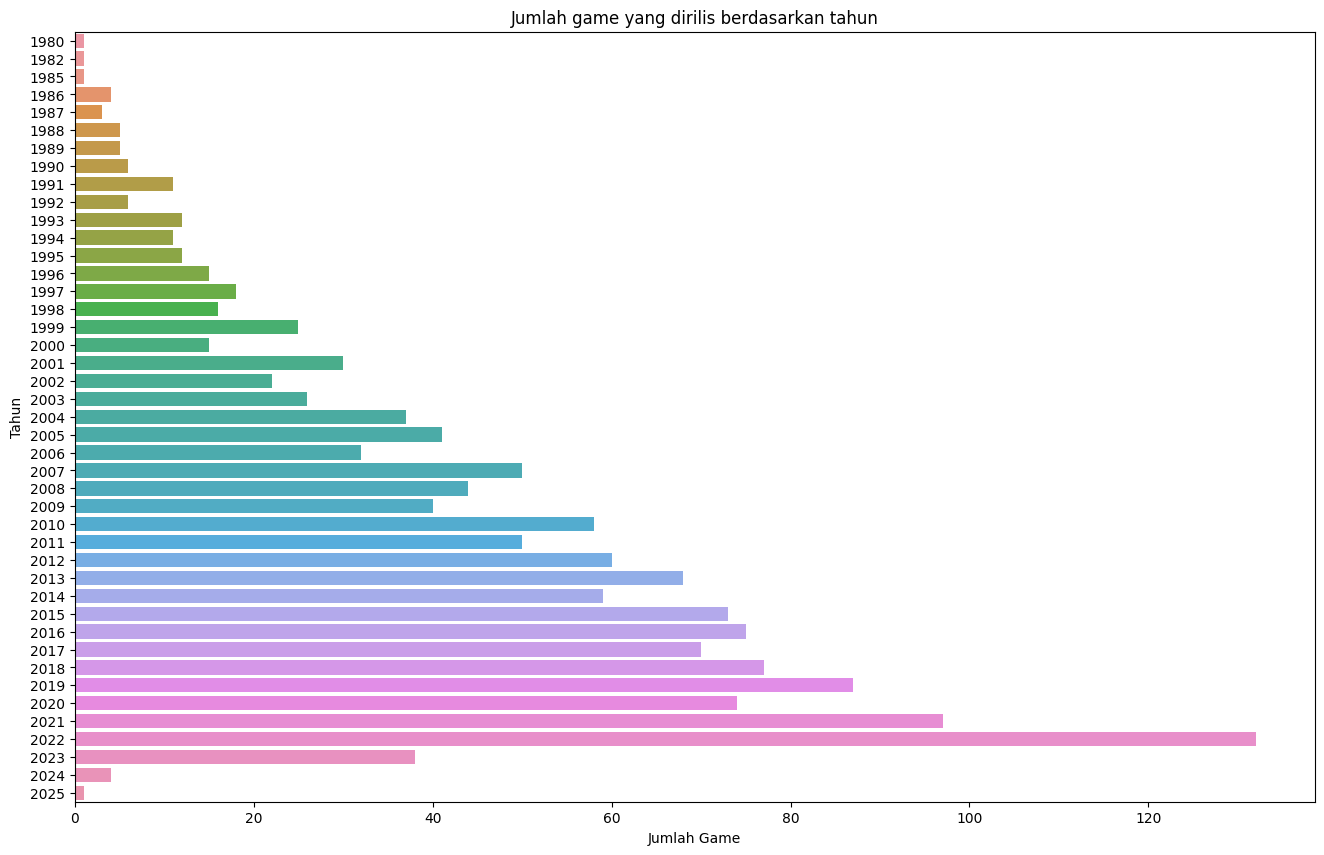

In [13]:
plt.figure(figsize=(16, 10))
plt.title('Jumlah game yang dirilis berdasarkan tahun')
sns.countplot(data=df, y='tahun')
plt.xlabel('Jumlah Game')
plt.ylabel('Tahun')
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa tahun dengan game rilis terbanyak berada pada tahun 2022 dan untuk paling sedikit berada pada 1980, 1982, 1985 dan 2025

## Visualisai Data Menggunakan Line Plot

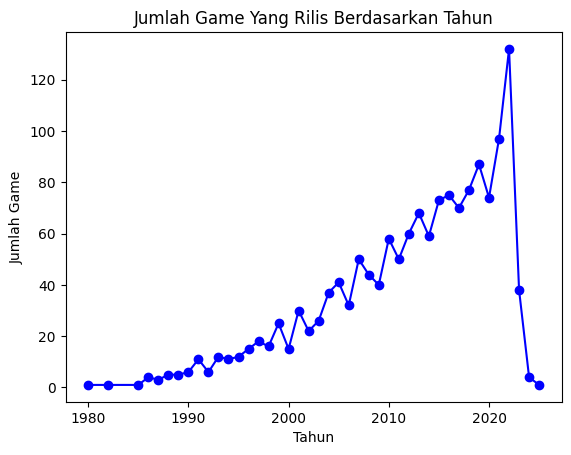

In [11]:
jumlah_game = df.groupby(df['tahun']).size()

plt.plot(jumlah_game.index, jumlah_game.values, marker='o', linestyle='-', color='blue')

plt.title('Jumlah Game Yang Rilis Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')

plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa tahun dengan game rilis terbanyak berada pada tahun 2022 dan untuk paling sedikit berada pada 1980, 1982, 1985 dan 2025

## Visualisai Data Menggunakan Pie Chart

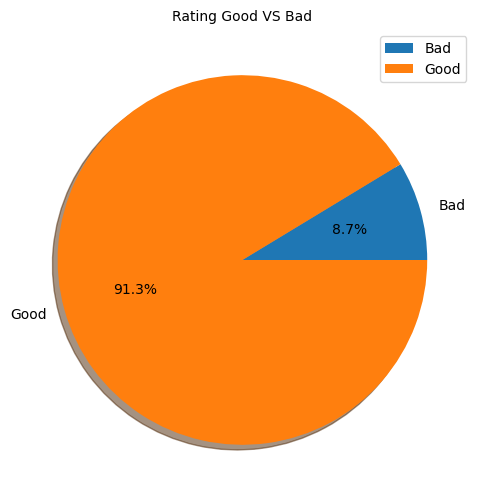

In [6]:
data = [df.Rating[df['Rating']<3].count(), df.Rating[df['Rating']>=3].count()]
label = ['Bad', 'Good']

figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(data, 
         labels=label, 
         autopct='%.1f%%',
         shadow=True)

plt.title("Rating Good VS Bad", size = 10)
plt.legend()
plt.show()

Menurut grafik diatas dapat disimpulkan :
  - Terdapat 91.3% dengan review yang baik
  - Terdapat 8.7% dengan review yang kurang baik

## Visualisai Data Menggunakan Scatter Plot

In [7]:
def rmv(x):
        y = x.split('K')
        return float(y[0])*1000 if len(y) == 2 else float(y[0])

In [8]:
df['Times Listed'] = df['Times Listed'].apply(rmv)
df['Number of Reviews'] = df['Number of Reviews'].apply(rmv)
df['Plays'] = df['Plays'].apply(rmv)
df['Playing'] = df['Playing'].apply(rmv)
df['Backlogs'] = df['Backlogs'].apply(rmv)
df['Wishlist'] = df['Wishlist'].apply(rmv)

C:\Users\Lenovo - GK\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


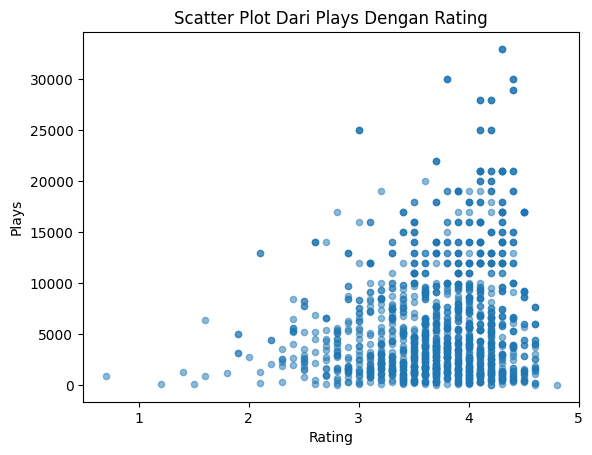

In [9]:
df.plot.scatter(x='Rating', y='Plays', cmap="YlOrRd", alpha=0.5)
plt.title('Scatter Plot Dari Plays Dengan Rating')
plt.show()

Berdasarkan dari grafik diatas dapat dilihat bahwa rating antara 3 dan 5 adalah jumlah yang paling banyak dimainkan